# Creating image to latex code dataset

The goal of this notebook is to explain you how to build your own mathematical-formula/latex-equivalent datasets.

## Generating latex code

To build a mathematical latex formula, we first need to have a definition of the used package in the header. Then a `\begin{document}`, then our code then a `\end{document}`. Note that in Python, to print a `\` we need to have a double (`\\`). The `\[` and `\]` delimite the mathematical formula.

In [96]:
header = """
\\documentclass[11pt,a4paper]{article}
\\usepackage[utf8]{inputenc}
\\usepackage[T1]{fontenc}
\\usepackage{hyperref}
\\usepackage{lmodern}
\\usepackage[english]{babel}
\\usepackage{appendix}
\\usepackage{enumitem}
\\usepackage{amsfonts}
\\usepackage{amsmath}
\\usepackage{amssymb}
\\usepackage{mathabx}
\\usepackage{bbm}

\\pagenumbering{gobble} 

\\begin{document}
\\[
"""

footer = """
\\]
\\end{document}
"""

Then we need to generate the code randomly. We will first define all the symbol that we want (you can obiously add the one you want).

In [97]:
characters = [str(i) for i in range(10)] + [chr(i+97) for i in range(26)] + [chr(i+65) for i in range(26)]
symbols = ["=", ">", "<", "\\leq", "\\geq", "\\equiv", "\\sim", "(", ")", "[", "]", "\\{", "\\}", "\\emptyset", "\\infty", "+",
           "-", "\\pi", "\\Pi", "\\sum", "\\times", "\\sigma", "\\rho", "log", "exp"]
functions1 = ["\\sqrt", "^", "_"]
functions2 = ["\\frac", "\\underset", "\\overset"]

print(characters)
print(symbols)
print(functions1)
print(functions2)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['=', '>', '<', '\\leq', '\\geq', '\\equiv', '\\sim', '(', ')', '[', ']', '\\{', '\\}', '\\emptyset', '\\infty', '+', '-', '\\pi', '\\Pi', '\\sum', '\\times', '\\sigma', '\\rho', 'log', 'exp']
['\\sqrt', '^', '_']
['\\frac', '\\underset', '\\overset']


Then, we will randomly generate a formula based on the previous list we have defined.

In [98]:
import random as rd 

def create_formula(l=10, p1=0.2, p2=0.1, p1_max=1, p2_max=1):

    def aux(l, p1_max, p2_max):
        x = rd.random()
        txt = ""
        if p1_max>0 and x <= p1:
            f1 = rd.choice(functions1)
            txt += f1 + "{"
            res, l, p1_max, p2_max = aux(l, p1_max-1, p2_max)
            txt += res
            txt += "}"

        elif p2_max>0 and x <= p1 + p2:
            f2 = rd.choice(functions2)
            txt += f2 + "{"
            res, l, p1_max, p2_max = aux(l-1, p1_max, p2_max-1)
            txt += res

            txt += "}{"
            res, l, p1_max, p2_max = aux(l+1, p1_max, p2_max)
            txt += res
            txt += "}"

        else:
            nb_sym = rd.randint(0, l)
            for _ in range(nb_sym):
                txt += rd.choice(characters + symbols) + " "
            l -= nb_sym
            if l>0:
                res, l, p1_max, p2_max = aux(l, p1_max, p2_max)
                txt += res

        return txt, l, p1_max, p2_max
    
    return rd.choice(characters+symbols) + " " + aux(l-1, p1_max, p2_max)[0]

formula = create_formula(l=18, p1=0.2, p2=0.1, p1_max=1, p2_max=1)
print(formula)


C D 5 9 + V > \sum A \sqrt{X - ( \sim R ] \underset{3 f }{\sigma }}


Now, we can create our full `.tex` document.

In [100]:
tex_doc_str = header + formula + footer
print(tex_doc_str)

file_name = "doc1"
f = open(file_name + ".tex", "w")
f.write(tex_doc_str)
f.close()


\documentclass[11pt,a4paper]{article}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{hyperref}
\usepackage{lmodern}
\usepackage[english]{babel}
\usepackage{appendix}
\usepackage{enumitem}
\usepackage{amsfonts}
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{mathabx}
\usepackage{bbm}

\pagenumbering{gobble} 

\begin{document}
\[
C D 5 9 + V > \sum A \sqrt{X - ( \sim R ] \underset{3 f }{\sigma }}
\]
\end{document}



## Compile .tex document to pdf

Then, we need to compile our latex formula to a pdf image. For that we need to install `TexLive`, for that execute the following command lines in your terminal:

`sudo apt-get install texlive-latex-base`

`sudo apt-get install texlive-fonts-recommended`

`sudo apt-get install texlive-fonts-extra`

`sudo apt-get install texlive-latex-extra`

In [101]:
import os

os.system("pdflatex " + file_name + ".tex")

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./doc1.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/hyperref.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/kvsetkeys/kvsetkeys.sty)
(/usr/share/texlive/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
(/usr/share/texlive/texmf-dist/tex/generic/pdfescape/pdfescape.sty
(/usr/share/texlive/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
(/us

0

## Computing cleaner image

Then, we want to convert our pdf to a cropped image (numpy array). But first we need to convert our pdf to a usable format like `.png`. See the notebook about image dataset for more understanding.

In [102]:
from pdf2image import convert_from_path

pages = convert_from_path(file_name + ".pdf")

for count, page in enumerate(pages):
    # We have only one page
    page.save(f'{file_name}.png', 'PNG')

<class 'numpy.ndarray'>


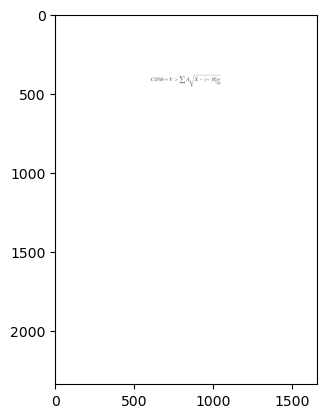

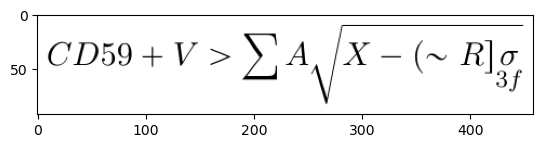

<class 'list'>


In [103]:
import matplotlib.pyplot as plt

def gray_level(img):
    return img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3

def crop(arr, wb=1, k=2):
    # Crop a greyscale image
    # wb is the white bound
    # k represent the amount of pixels we keep on the side
    n,m = arr.shape
    x, X, y, Y = n, 0, m, 0
    for i in range(n):
        for j in range(m):
            if arr[i,j]<wb:
                x = min(x, i)
                X = max(X, i)
                y = min(y, j)
                Y = max(Y, j)
    
    return arr[max(x-k,0):min(X+k,n), max(y-k,0):min(Y+k,m)]


img = plt.imread(file_name + ".png")
print(type(img))
plt.imshow(img)
plt.show()

cropped = crop(gray_level(img), wb=0.95, k=10)
plt.imshow(cropped, cmap="gray")
plt.show()

img = img.tolist()
print(type(img))

## Creating dataset

We finally want to create a dataset wich will be a map containing two fields.

In [104]:
ds = {"images":[], "latex-formula":[]}

Then we add all the images and corresponding latex-formula we want.

In [105]:
ds["images"].append(img)
ds["latex-formula"].append(formula)

Finally we save our dataset thanks to the `json` package.

In [106]:
import json

json_object = json.dumps(ds)

ds_name = "files/image-latex-datasets.json"
with open(ds_name, "w") as f :
    f.write(json_object)

To open your dataset, do this:

In [107]:
with open(ds_name, 'r') as f:
    data = json.load(f)

print(data["latex-formula"])

['C D 5 9 + V > \\sum A \\sqrt{X - ( \\sim R ] \\underset{3 f }{\\sigma }}']
